<a href="https://colab.research.google.com/github/Anh-Ta-2020/PCA_demo/blob/main/Demo_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Direction to photo in your google drive
!ls "/content/drive/My Drive/Colab Notebooks/thap rua ho guom.jpg"

Mounted at /content/drive
'/content/drive/My Drive/Colab Notebooks/thap rua ho guom.jpg'


# New Section

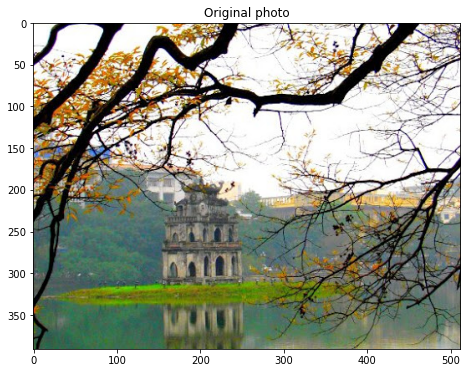

In [6]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

photo = imread("/content/drive/My Drive/Colab Notebooks/thap rua ho guom.jpg")

# Original photo
plt.figure(figsize=[10,6])
plt.title('Original photo')
plt.imshow(photo)

# New Section

(p,n) = (391, 512)


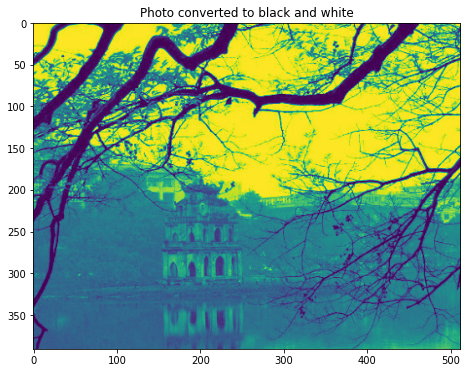

In [14]:
# Convert to black and white photo
photo_sum = photo.sum(axis=2)
photo_black_white = photo_sum/photo_sum.max()

# p x n
print("(p,n) = "+str(photo_black_white.shape))

# Black and white photo
plt.figure(figsize=[10,6])
plt.title('Photo converted to black and white')
plt.imshow(photo_black_white,)

# New Section

In [15]:

#PCA
pca = PCA()
pca.fit(photo_black_white)

# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)*100

# Find d to get 90% of the variance?
d_90 = np.argmax(cumulative_variance >= 90)
print("Dimension of 90% variance: "+ str(d_90))
# Find d to get 100% of the variance?
d_100 = np.argmax(cumulative_variance >= 100)
print("Dimension of 100% variance: "+ str(d_100))


Dimension of 90% variance: 41
Dimension of 100% variance: 389


# New Section

In [16]:
# Projecting to d dimensional subspace
def projected_photo(d):
    ipca = IncrementalPCA(n_components=d)
    image_recon = ipca.inverse_transform(ipca.fit_transform(photo_black_white))
    plt.imshow(image_recon)

# New Section

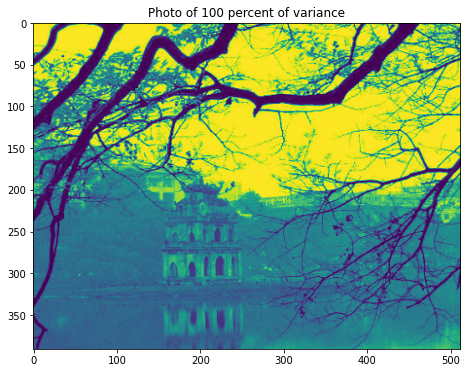

In [17]:
# Black and white photo

plt.figure(figsize=[10,6])
plt.title('Photo of 100 percent of variance')
projected_photo(d_100)

# New Section

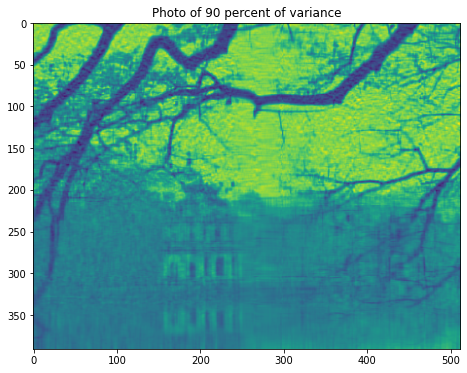

In [18]:
plt.figure(figsize=[10,6])
plt.title('Photo of 90 percent of variance')
projected_photo(d_90)

# New Section

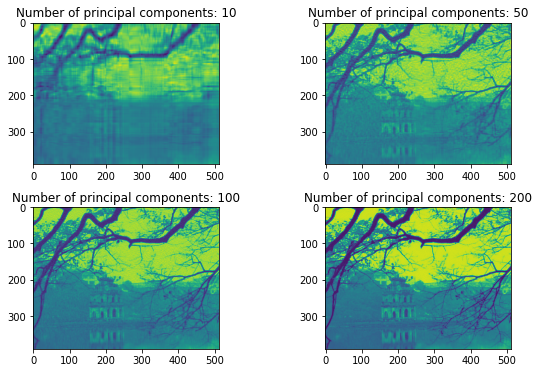

In [19]:
# Photos of diference number of principal components
number_of_principal_components = [10, 50, 100, 200]

plt.figure(figsize=[10,6])

for index in range(4):
    plt.subplot(2,2,index+1)
    projected_photo(number_of_principal_components[index])
    plt.title("Number of principal components: "+str(number_of_principal_components[index]))

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()